In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

c:\Users\akili\Desktop\kifiya\week9\Brent-Oil-Price-Change-Analysis\.venv1\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.4)
  from scipy.stats import gaussian_kde


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)
data.set_index('Date', inplace=True)
print(data.head())

# Extract year, month, and day features from the index
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Display the updated DataFrame
print(data.head())

C:\Users\akili\AppData\Local\Temp\ipykernel_17116\3145178326.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
            Price  Year  Month  Day
Date                               
1987-05-20  18.63  1987      5   20
1987-05-21  18.45  1987      5   21
1987-05-22  18.55  1987      5   22
1987-05-25  18.60  1987      5   25
1987-05-26  18.63  1987      5   26


In [24]:
data.columns

Index(['Price', 'Year', 'Month', 'Day'], dtype='object')

Price    0
dtype: int64


C:\Users\akili\AppData\Local\Temp\ipykernel_20908\3010698928.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(method='ffill', inplace=True)
C:\Users\akili\AppData\Local\Temp\ipykernel_20908\3010698928.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'].fillna(method='ffill', inplace=True)


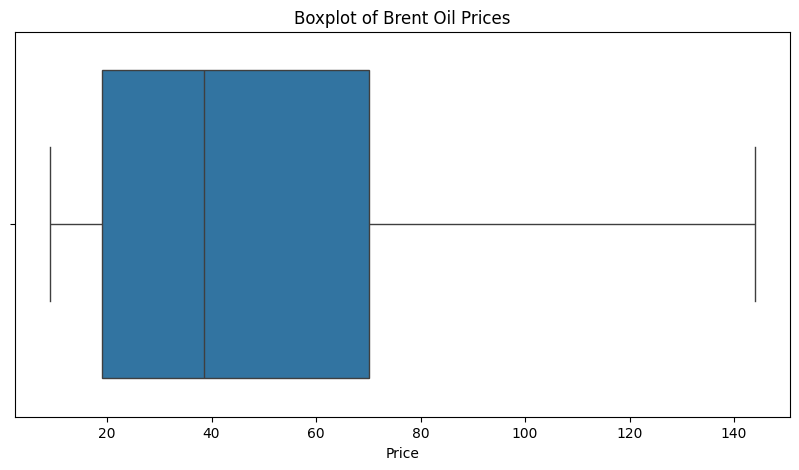

In [7]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values through forward fill
data['Price'].fillna(method='ffill', inplace=True)

# Check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Brent Oil Prices')
plt.show()

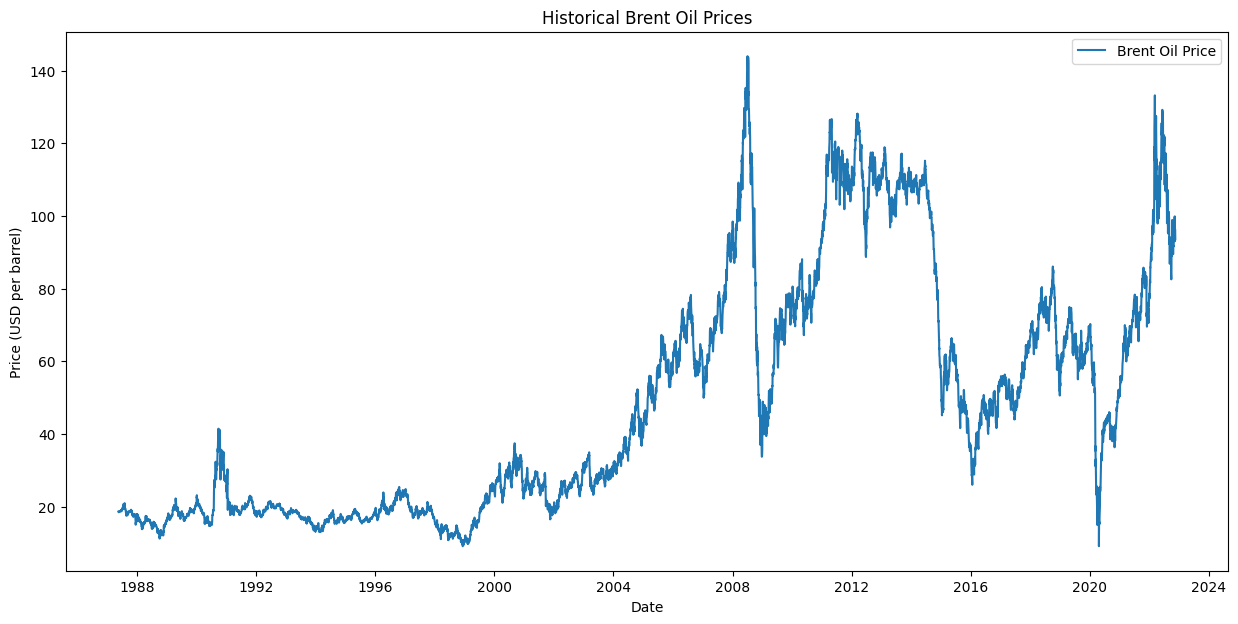

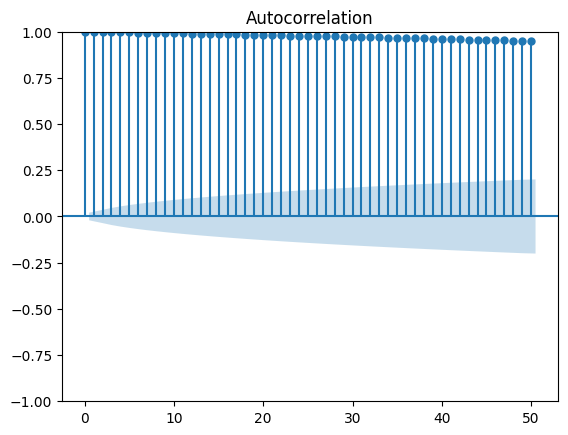

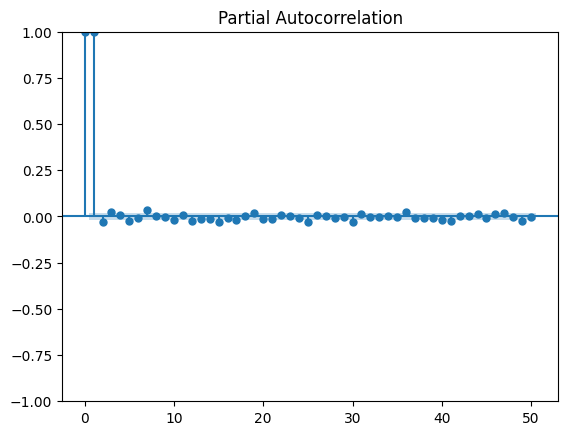

ADF Statistic: -1.993856011392467
p-value: 0.2892735048934032


In [8]:
# Plot the time series data
plt.figure(figsize=(15, 7))
plt.plot(data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()

# ACF and PACF plots
plot_acf(data['Price'], lags=50)
plot_pacf(data['Price'], lags=50)
plt.show()

# Check stationarity
result = adfuller(data['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

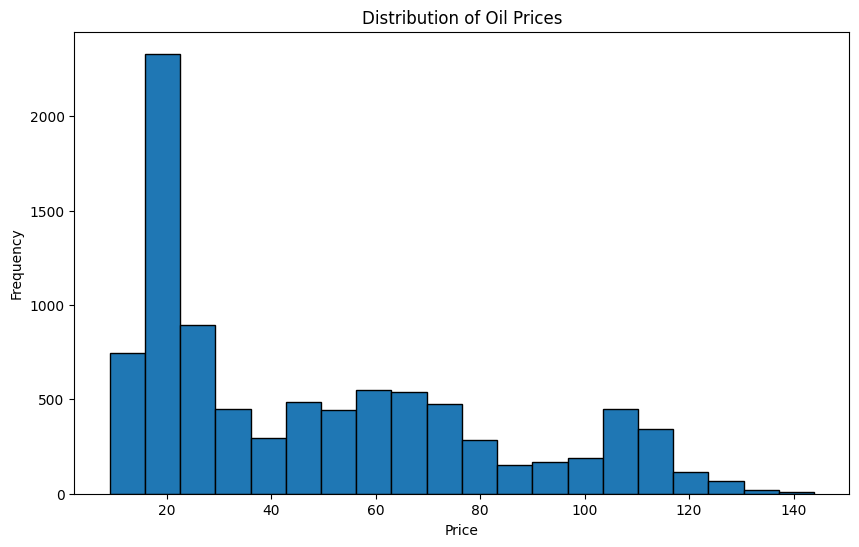

In [17]:
# Histogram: Distribution of oil prices
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

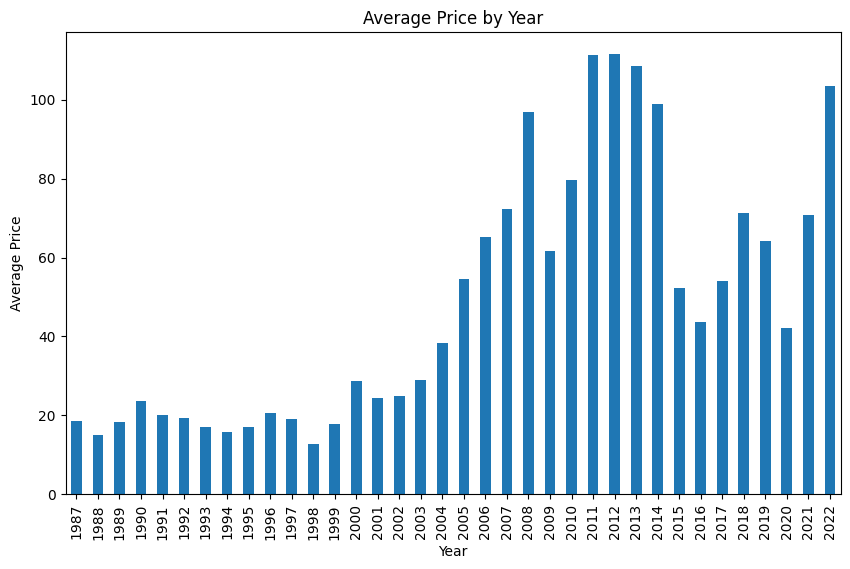

In [25]:
# Bar Chart: Average Price by Year
average_price_by_year = data.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_year.plot(kind='bar')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [26]:
# Descriptive Statistics
mean_price = data['Price'].mean()
median_price =  data['Price'].median()
std_price =  data['Price'].std()

print("Descriptive Statistics:")
print(f"Mean: {mean_price:.2f}")
print(f"Median: {median_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")

Descriptive Statistics:
Mean: 48.42
Median: 38.57
Standard Deviation: 32.86


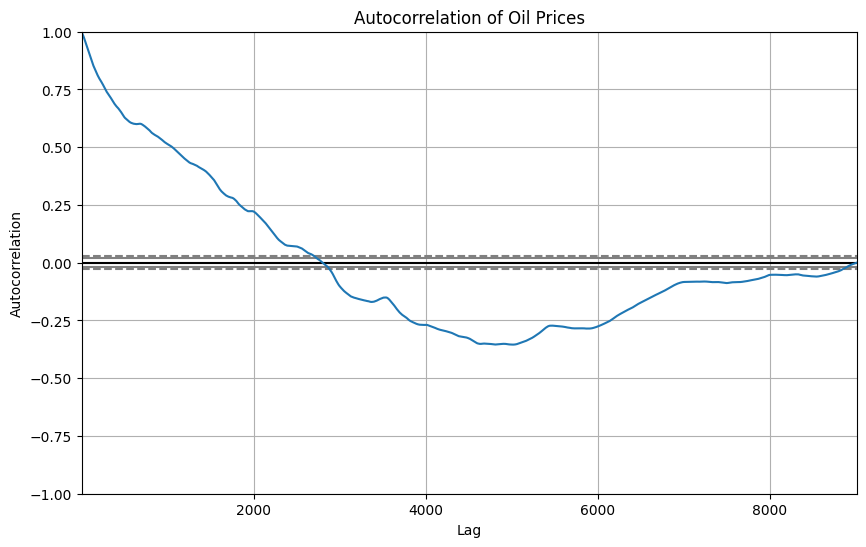

In [27]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Price'])
plt.title('Autocorrelation of Oil Prices')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [3]:
# Differencing to make the series stationary
data['Price_diff'] = data['Price'].diff().dropna()

# Fit ARIMA model
model = auto_arima(data['Price_diff'].dropna(), seasonal=False, trace=True)
model.summary()

# Fit model with ARIMA parameters
arima_model = ARIMA(data['Price'], order=(5, 1, 0))
arima_result = arima_model.fit()
print(arima_result.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29075.828, Time=1.74 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29098.172, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29094.409, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=29094.124, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=29093.231, Time=0.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29093.013, Time=1.50 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=4.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=3.67 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29093.899, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=29094.073, Time=1.81 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=29094.084, Time=0.84 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=29077.815, Time=3.99 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29077.401, Time=3.14 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 22.675 seconds


c:\Users\akili\Desktop\kifiya\week9\Brent-Oil-Price-Change-Analysis\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akili\Desktop\kifiya\week9\Brent-Oil-Price-Change-Analysis\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\akili\Desktop\kifiya\week9\Brent-Oil-Price-Change-Analysis\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Thu, 04 Jul 2024   AIC                          29093.226
Time:                        00:37:50   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1